In [192]:
import pandas as pd

In [193]:
df = pd.read_csv('./data_csv/players_full_data_v2.csv')

df.head()

,weekNumber,totalPoints,id,name,position,team_id,team_shortName,cum_totalPoints,cumavg_totalPoints,curr_match_as_local,curr_match_opponent_id
0,1,1,1000,Edgar Paul Akouokou,Centrocampista,5,BET,0.0,0.00,True,7
1,2,2,1000,Edgar Paul Akouokou,Centrocampista,5,BET,1.0,1.00,False,33
2,3,0,1000,Edgar Paul Akouokou,Centrocampista,5,BET,3.0,1.50,True,13
3,5,0,1000,Edgar Paul Akouokou,Centrocampista,5,BET,3.0,1.00,True,20
4,6,2,1000,Edgar Paul Akouokou,Centrocampista,5,BET,3.0,0.75,True,28


In [156]:
df.shape

(8751, 11)

In [157]:
df = df.drop(columns=['weekNumber', 'name', 'team_shortName'])

In [158]:
df.shape

(8751, 8)

In [159]:
df.isna().sum()

totalPoints               0
id                        0
position                  0
team_id                   0
cum_totalPoints           0
cumavg_totalPoints        0
curr_match_as_local       0
curr_match_opponent_id    0
dtype: int64

In [160]:
# filtering out players that appear less than 10 times as we need both
# for training and testing
tmp = df['id'].tolist()
df = df[df['id'].apply(lambda x: tmp.count(x) >= 10)]

In [161]:
df.shape

(8455, 8)

In [162]:
# target
target_var = 'totalPoints'

# create X and y data frames
X = df.drop(columns=target_var)
y = df[target_var]

X.shape, y.shape

((8455, 7), (8455,))

In [163]:
from sklearn.model_selection import train_test_split

# Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=X[['id']])

## RandomForest

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# categorical columns
cat_columns = ['id', 'position', 'team_id', 'curr_match_opponent_id']

# define one hot encoder
ohe = OneHotEncoder(sparse_output=False)
ohe_transfromer = ColumnTransformer([('ohe', ohe, cat_columns)], remainder='passthrough')

# pipeline
pipe = Pipeline([
    ('ohe_transformer', ohe_transfromer),
    ('scaler', StandardScaler()),
    ('estimator', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ohe_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['id', 'position', 'team_id',
                                                   'curr_match_opponent_id'])])),
                ('scaler', StandardScaler()),
                ('estimator', RandomForestClassifier())])

In [165]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

pred = pipe.predict(X_test)
np.sqrt(MSE(y_test, pred))

3.468111042716576

## XGBoost

In [166]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score

In [167]:
estimator = XGBRegressor()

pipe = Pipeline([
    ('ohe_transformer', ohe_transfromer),
    ('scaler', StandardScaler()),
    ('estimator', estimator)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ohe_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['id', 'position', 'team_id',
                                                   'curr_match_opponent_id'])])),
                ('scaler', StandardScaler()),
                ('estimator',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [168]:
pred = pipe.predict(X_test)


In [169]:
np.sqrt(MSE(y_test, pred))

2.9898020853810485

(array([1.000e+00, 1.000e+01, 8.000e+00, 1.850e+02, 2.122e+03, 2.294e+03,
        8.370e+02, 1.190e+03, 4.980e+02, 7.060e+02, 3.570e+02, 8.600e+01,
        1.000e+02, 1.700e+01, 2.800e+01, 7.000e+00, 5.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([-7.  , -5.45, -3.9 , -2.35, -0.8 ,  0.75,  2.3 ,  3.85,  5.4 ,
         6.95,  8.5 , 10.05, 11.6 , 13.15, 14.7 , 16.25, 17.8 , 19.35,
        20.9 , 22.45, 24.  ]),
 <BarContainer object of 20 artists>)

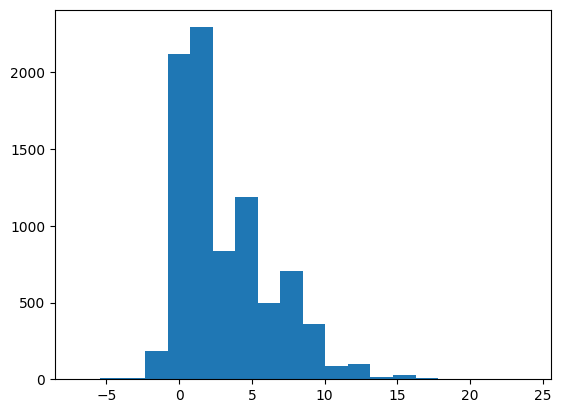

In [170]:
import matplotlib.pyplot as plt

plt.hist(df['totalPoints'], bins=20)

(array([ 35., 172., 230., 309., 324., 262., 160., 104.,  50.,  22.,  12.,
          5.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([-0.45258278,  0.32313597,  1.09885478,  1.87457347,  2.65029216,
         3.42601109,  4.20172977,  4.97744846,  5.75316715,  6.52888584,
         7.30460501,  8.08032322,  8.85604191,  9.6317606 , 10.40748024,
        11.18319893, 11.95891762, 12.73463631, 13.510355  , 14.28607368,
        15.06179237]),
 <BarContainer object of 20 artists>)

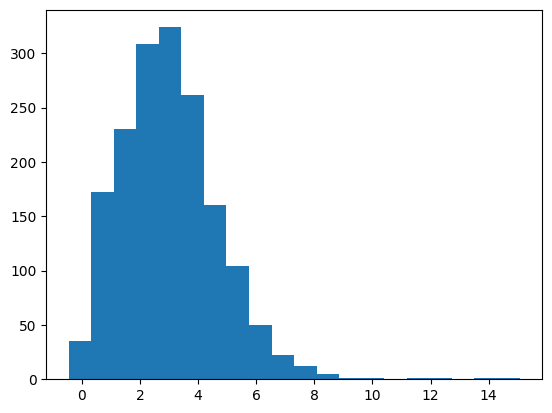

In [171]:
plt.hist(pred, bins=20)

In [172]:
df_predictions = pd.read_csv('./data_csv/players_full_data_v2.csv')

In [173]:
df_predictions[df_predictions['name'].str.contains('Lewan')]

,weekNumber,totalPoints,id,name,position,team_id,team_shortName,cum_totalPoints,cumavg_totalPoints,curr_match_as_local,curr_match_opponent_id
4296,2,15,1505,Robert Lewandowski,Delantero,4,BAR,0.0,0.000000,False,16
4297,3,17,1505,Robert Lewandowski,Delantero,4,BAR,15.0,15.000000,True,19
4298,4,11,1505,Robert Lewandowski,Delantero,4,BAR,32.0,16.000000,False,17
4299,5,15,1505,Robert Lewandowski,Delantero,4,BAR,43.0,14.333333,False,162
4300,6,16,1505,Robert Lewandowski,Delantero,4,BAR,58.0,14.500000,True,7
4301,7,9,1505,Robert Lewandowski,Delantero,4,BAR,74.0,14.800000,False,33
4302,8,3,1505,Robert Lewandowski,Delantero,4,BAR,83.0,13.833333,True,6
4303,9,5,1505,Robert Lewandowski,Delantero,4,BAR,86.0,12.285714,False,15
4304,10,15,1505,Robert Lewandowski,Delantero,4,BAR,91.0,11.375000,True,20
4305,11,13,1505,Robert Lewandowski,Delantero,4,BAR,106.0,11.777778,True,3


In [179]:
player = df.iloc[[4309]]
pipe.predict(player)

array([4.44255], dtype=float32)

In [187]:
X_test['predictions'] = pred

X_test.sort_values('predictions', ascending=False)

,id,position,team_id,cum_totalPoints,cumavg_totalPoints,curr_match_as_local,curr_match_opponent_id,predictions
8616,974,Centrocampista,6,98.0,5.157895,True,2,15.061792
8614,974,Centrocampista,6,78.0,4.588235,True,3,14.276387
7720,842,Delantero,7,6.0,2.000000,False,20,12.078980
4301,1505,Delantero,4,74.0,14.800000,False,33,11.291894
269,1046,Portero,14,46.0,4.600000,True,162,9.694212
...,...,...,...,...,...,...,...,...
5364,204,Portero,13,0.0,0.000000,False,15,-0.142370
1114,1145,Defensa,162,9.0,0.692308,False,15,-0.155478
8709,993,Portero,2,11.0,0.500000,False,15,-0.170099
7243,74,Defensa,3,14.0,4.666667,False,4,-0.448260


In [190]:
df_predictions[df_predictions['id'] == 842]

,weekNumber,totalPoints,id,name,position,team_id,team_shortName,cum_totalPoints,cumavg_totalPoints,curr_match_as_local,curr_match_opponent_id
7717,1,2,842,Pere Milla Peña,Delantero,7,ELC,0.0,0.000000,False,5
7718,2,2,842,Pere Milla Peña,Delantero,7,ELC,2.0,2.000000,True,1
7719,3,2,842,Pere Milla Peña,Delantero,7,ELC,4.0,2.000000,True,16
7720,4,-1,842,Pere Milla Peña,Delantero,7,ELC,6.0,2.000000,False,20
7721,5,2,842,Pere Milla Peña,Delantero,7,ELC,5.0,1.250000,True,3
7722,7,2,842,Pere Milla Peña,Delantero,7,ELC,7.0,1.400000,False,14
7723,8,2,842,Pere Milla Peña,Delantero,7,ELC,9.0,1.500000,True,33
7724,9,12,842,Pere Milla Peña,Delantero,7,ELC,11.0,1.571429,False,18
7725,10,2,842,Pere Milla Peña,Delantero,7,ELC,23.0,2.875000,True,15
7726,11,7,842,Pere Milla Peña,Delantero,7,ELC,25.0,2.777778,False,8


In [191]:
player

,totalPoints,id,position,team_id,cum_totalPoints,cumavg_totalPoints,curr_match_as_local,curr_match_opponent_id
4388,7,1509,Delantero,6,66.0,3.142857,True,19
